In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Violencia_Intrafamiliar.csv', low_memory=False, sep=',')

In [3]:
df_modificable = df.copy()

In [4]:
prueba = df_modificable.groupby(['DEPARTAMENTO', 'ARMAS MEDIOS']).agg({
    'ARMAS MEDIOS' : 'count'
})

In [5]:
df_modificable['DEPARTAMENTO'] = df_modificable['DEPARTAMENTO'].astype('object')
df_modificable['FECHA HECHO'] = df_modificable['FECHA HECHO'].astype('datetime64')
df_modificable.dtypes

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16/01/2010' in DD/MM/YYYY format. Provide format or specif

DEPARTAMENTO            object
MUNICIPIO               object
CODIGO DANE             object
ARMAS MEDIOS            object
FECHA HECHO     datetime64[ns]
GENERO                  object
GRUPO ETARIO            object
CANTIDAD                 int64
dtype: object

In [6]:
departamento = df_modificable['DEPARTAMENTO'].unique()

In [7]:
df_modificable.DEPARTAMENTO = df_modificable.DEPARTAMENTO.str.capitalize()
df_modificable.MUNICIPIO = df_modificable.MUNICIPIO.str.capitalize()
df_modificable.rename(columns={'ARMAS MEDIOS': 'Armas_Medios'}, inplace=True)
df_modificable.Armas_Medios = df_modificable.Armas_Medios.str.title()
df_modificable.GENERO = df_modificable.GENERO.str.capitalize()
df_modificable.rename(columns={'GRUPO ETARIO': 'Etario'}, inplace=True)
df_modificable.Etario = df_modificable.Etario.str.title()
df_modificable

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,Armas_Medios,FECHA HECHO,GENERO,Etario,CANTIDAD
0,Atlántico,Barranquilla (ct),8001000,Arma Blanca / Cortopunzante,2010-01-01,Masculino,Adultos,1
1,Boyacá,Duitama,15238000,Arma Blanca / Cortopunzante,2010-01-01,Femenino,Adultos,1
2,Caquetá,Puerto rico,18592000,Arma Blanca / Cortopunzante,2010-01-01,Masculino,Adultos,1
3,Casanare,Maní,85139000,Arma Blanca / Cortopunzante,2010-01-01,Femenino,Adultos,1
4,Cundinamarca,Bogotá d.c. (ct),11001000,Arma Blanca / Cortopunzante,2010-01-01,Femenino,Adultos,1
...,...,...,...,...,...,...,...,...
650956,Vaupés,Mitú (ct),97001000,Sin Empleo De Armas,2024-01-19,Femenino,Adultos,2
650957,Vaupés,Mitú (ct),97001000,Sin Empleo De Armas,2024-01-21,Femenino,Adolescentes,1
650958,Vichada,La primavera,99524000,Sin Empleo De Armas,2024-06-01,Femenino,Adultos,1
650959,Vichada,La primavera,99524000,Sin Empleo De Armas,2024-01-28,Femenino,Adultos,1


In [18]:
conteo = df_modificable.groupby(['Armas_Medios']).agg({
    'CANTIDAD' : 'sum',
})
conteo

,CANTIDAD
Armas_Medios,
-,1
Arma Blanca / Cortopunzante,49279
Arma De Fuego,3047
Contundentes,466630
Cortantes,1178
Cortopunzantes,1195
Escopolamina,7294
No Reporta,4972
No Reportado,149690


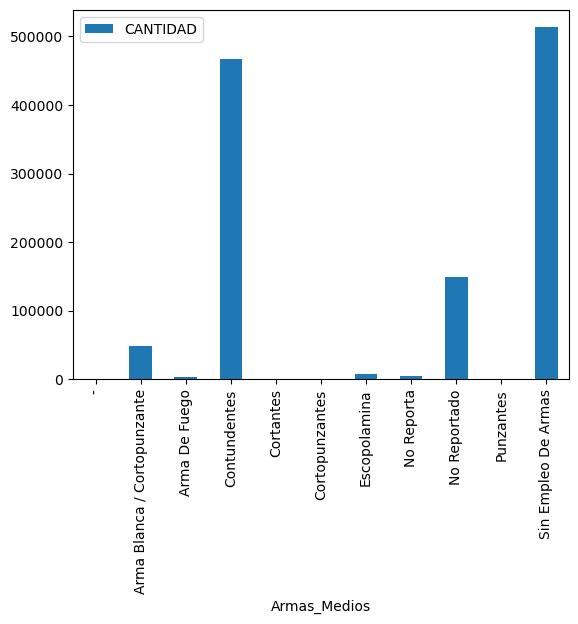

In [19]:
conteo.plot.bar(
        stacked = True,
)
plt.show()